In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('Comcast_telecom_complaints_data.csv')
df

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-2015,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-2015,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-2015,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-2015,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-2015,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No
...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,04-02-2015,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-2015,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2221,331188,complaint about comcast,06-09-2015,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No
2222,360489,Extremely unsatisfied Comcast customer,23-06-2015,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No


In [ ]:
df.head(10)


,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-2015,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-2015,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-2015,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-2015,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-2015,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No
5,338519,ISP Charging for arbitrary data limits with ov...,06-12-2015,06-Dec-15,9:59:40 PM,Internet,Acworth,Georgia,30101,Solved,No
6,361148,Throttling service and unreasonable data caps,24-06-2015,24-Jun-15,10:13:55 AM,Customer Care Call,Acworth,Georgia,30101,Pending,No
7,359792,Comcast refuses to help troubleshoot and corre...,23-06-2015,23-Jun-15,6:56:14 PM,Internet,Adrian,Michigan,49221,Solved,No
8,318072,Comcast extended outages,06-01-2015,06-Jan-15,11:46:30 PM,Customer Care Call,Alameda,California,94502,Closed,No
9,371214,Comcast Raising Prices and Not Being Available...,28-06-2015,28-Jun-15,6:46:31 PM,Customer Care Call,Alameda,California,94501,Open,Yes


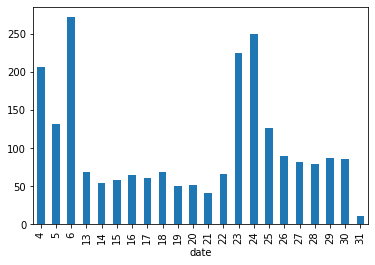

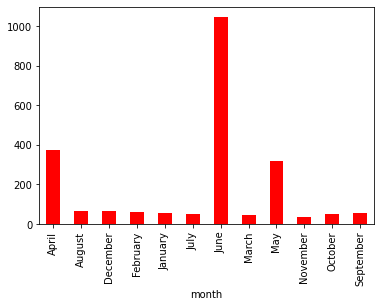

In [ ]:
# Provide the trend chart for the number of complaints of monthly and daily

df['month']=pd.to_datetime(df['Date_month_year']).dt.month_name()
df['date']=pd.to_datetime(df['Date_month_year']).dt.day

df.groupby(['date'])['Customer Complaint'].count().plot(kind='bar')
plt.show()

df.groupby(['month'])['Customer Complaint'].count().plot(kind='bar',color='red')
plt.show()

In [ ]:
# provide a table with the frequency of complaint types.

df['Customer Complaint'].value_counts().to_frame().reset_index()

,index,Customer Complaint
0,Comcast,83
1,Comcast Internet,18
2,Comcast Data Cap,17
3,comcast,13
4,Comcast Data Caps,11
...,...,...
1836,Comcast customer service and billing complaint,1
1837,Comcast Failure of Service,1
1838,Comcast data caps in currently uncompetitive N...,1
1839,Comcast data limits and overage charges,1


In [ ]:
#which complaint types are maximum
df['Customer Complaint'].value_counts().head()


Comcast              83
Comcast Internet     18
Comcast Data Cap     17
comcast              13
Comcast Data Caps    11
Name: Customer Complaint, dtype: int64

In [ ]:
df['Status']=df['Status'].apply(lambda x: 'Open' if ((x=='Open') | (x=='Pending')) else 'Closed')

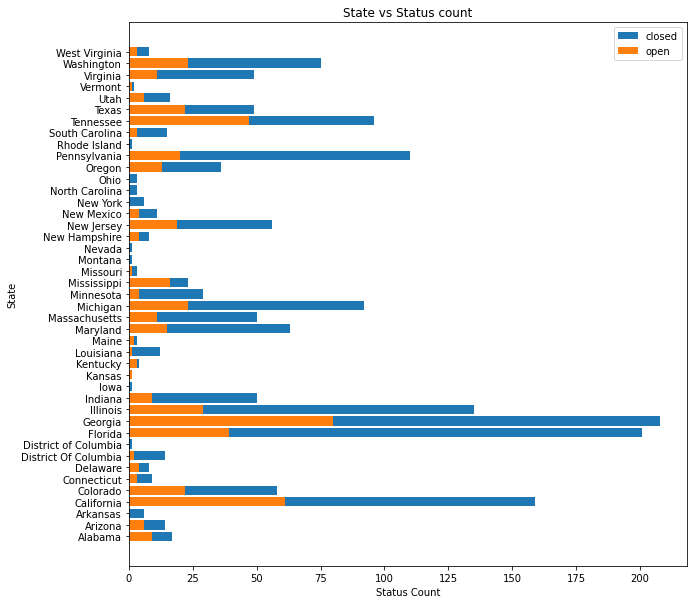

In [ ]:
df['Quarter']=pd.to_datetime(df['Date_month_year']).dt.quarter
#filter data on Q3
op=df[df['Status']=='Open'].groupby(['State'])['Status'].count().to_frame().reset_index()
cl=df[df['Status']=='Closed'].groupby(['State'])['Status'].count().to_frame().reset_index()

fig=plt.figure(figsize=(10,10))
plt.barh(cl.State, cl.Status)
plt.barh(op.State, op.Status)

plt.ylabel("State",size=10)
plt.xlabel("Status Count")
plt.legend(["closed","open"])
plt.title("State vs Status count")
plt.show()

In [ ]:
#which state has the maximum complaints
'Georgia'

'Georgia'

In [ ]:
#which state has the highest percentageof unresolved complaints
'Georgia'

'Georgia'

In [ ]:
#Provide the percentage of complaints resolved till date,
#which were received through the internet and customer care calls.

df[df['Status']=='Closed'].groupby('Status')['Received Via'].value_counts(normalize=True)*100

Status  Received Via      
Closed  Customer Care Call    50.615114
        Internet              49.384886
Name: Received Via, dtype: float64